---
# <font color="Blue">Case Study On Lead Scoring </font>
#### <font color="Blue">Submitted By : Nistha Kumar & Gaurav Rana</font>
#### <font color="Blue"> Submitted On : 06-Sep-20</font>
---
### <font color="Blue"> Approach: </font>
#####  1. Import required libraries and read data
#####  2. Data Cleaning
#####  3. Outlier Handling
#####  4. EDA - Data Visualization
#####  5. Data Preparation
#####  6. Train - Test Split & Scaling
#####  7. Model Creation (Mixed : Automated + Manual - to arrive at the right features)
#####  8. Finding the right probability cut-off
#####  9. Model Evaluation
#####  10. Lead Score Assignment
---

# <font color="Blue">1. Import required libraries and read data</font>

In [1]:
# Importing all basic libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

# Setting max columns to be displayed
pd.set_option('display.max_columns', None)

# Importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# For manually running models we would use statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for metrics calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the data and checking for rows and columns
lead_data = pd.read_csv("Leads.csv")
# storing the original rows and columns to see what %age of data is eventually retained later
orig_rows,orig_cols = lead_data.shape[0],lead_data.shape[1]
print(orig_rows,orig_cols)

9240 37


In [3]:
# Checking 1st 5 rows of the data
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking numerical coliumns
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Viewing columns and their data types
# Converted-> Target Variable
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# <font color="Blue">2. Data Cleaning</font>
### Sub steps:
- 1. Replace 'Select' with nan
- 2. Delete columns which have > 40% nulls
- 3. Delete rows which have more than 6 colums as nulls
- 4. There are some "score "variables which were updated by sales people - delete these columns
- 5. Look at all categorical variables, unique values, combine categories wherever makes sense and handle null
- 6. Look at all numeric variables - handle nulls

In [6]:
# Any unanswered question in the forms may have been left as "Select" so let's first replace them with nulls
lead_data = lead_data.replace("Select", np.nan)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Checking column-wise NULLs
round(100*(lead_data.isnull().sum().sort_values(ascending=False)/len(lead_data.index)), 2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [8]:
# any column which has more than 40% NULLs - let's drop them
thresh = len(lead_data) * .6
lead_data.dropna(thresh = thresh, axis = 1, inplace = True)
lead_data.shape

(9240, 30)

In [9]:
# now let's again check to ensure all columns have less than 40% nulls
round(100*(lead_data.isnull().sum().sort_values(ascending=False)/len(lead_data.index)), 2)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [10]:
# now let's find all the rows where more than 6 columns are NULLs
lead_data[lead_data.isnull().sum(axis=1) > 6]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
134,0298b9a5-fedb-408b-a284-2d357583600f,659153,Lead Add Form,Welingak Website,No,No,1,NaN,889,NaN,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
179,1730b5e8-e435-41c6-9082-b9c98976bd16,658627,Lead Add Form,Welingak Website,No,No,1,NaN,458,NaN,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
180,db2dc4b5-f603-4818-9b0c-0435923a4cd8,658623,Lead Add Form,Welingak Website,No,No,1,NaN,1060,NaN,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
680,d1cebc5e-47b1-40cd-b5d1-d8924bc23ee0,653547,API,Olark Chat,No,No,0,NaN,177,NaN,Olark Chat Conversation,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
836,b2dfb7a5-814d-465b-816e-63d6b3a863ca,651660,Lead Add Form,NaN,Yes,No,1,NaN,1378,NaN,Email Bounced,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
994,1627d1fe-f39b-4a29-ba9e-ab40ab643d05,649493,Lead Add Form,Welingak Website,No,No,1,NaN,1212,NaN,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,NaN,No,No,Modified
1123,498b9fe5-4e52-11e6-96be-22000aa8e760,647974,Lead Import,Facebook,No,No,0,NaN,93,NaN,SMS Sent,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,Mumbai,No,No,Modified
1124,498ba39a-4e52-11e6-96be-22000aa8e760,647975,Lead Import,Facebook,No,No,0,NaN,270,NaN,SMS Sent,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,Other Cities of Maharashtra,No,No,Modified


In [11]:
lead_data[lead_data.isnull().sum(axis=1) > 6].shape[0]

20

In [12]:
# there are 20 rows which have more than 6 columns as NULLs - let's remove them
lead_data = lead_data[~(lead_data.isnull().sum(axis=1) > 6)]
lead_data.shape

(9220, 30)

In [13]:
# Delete Score variables:
# there are some columns which were updated by Sales team on contacting the leads
# this are : 'Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index',
#           'Asymmetrique Activity Score','Asymmetrique Profile Score'
# most of these columns have already been deleted because they had high NULL ratio
# 'Tags' also need to be deleted
lead_data.drop('Tags',axis=1,inplace=True)

In [14]:
# Categorical Columns
cat_col = lead_data.select_dtypes(include = ['object']).columns
cat_col

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

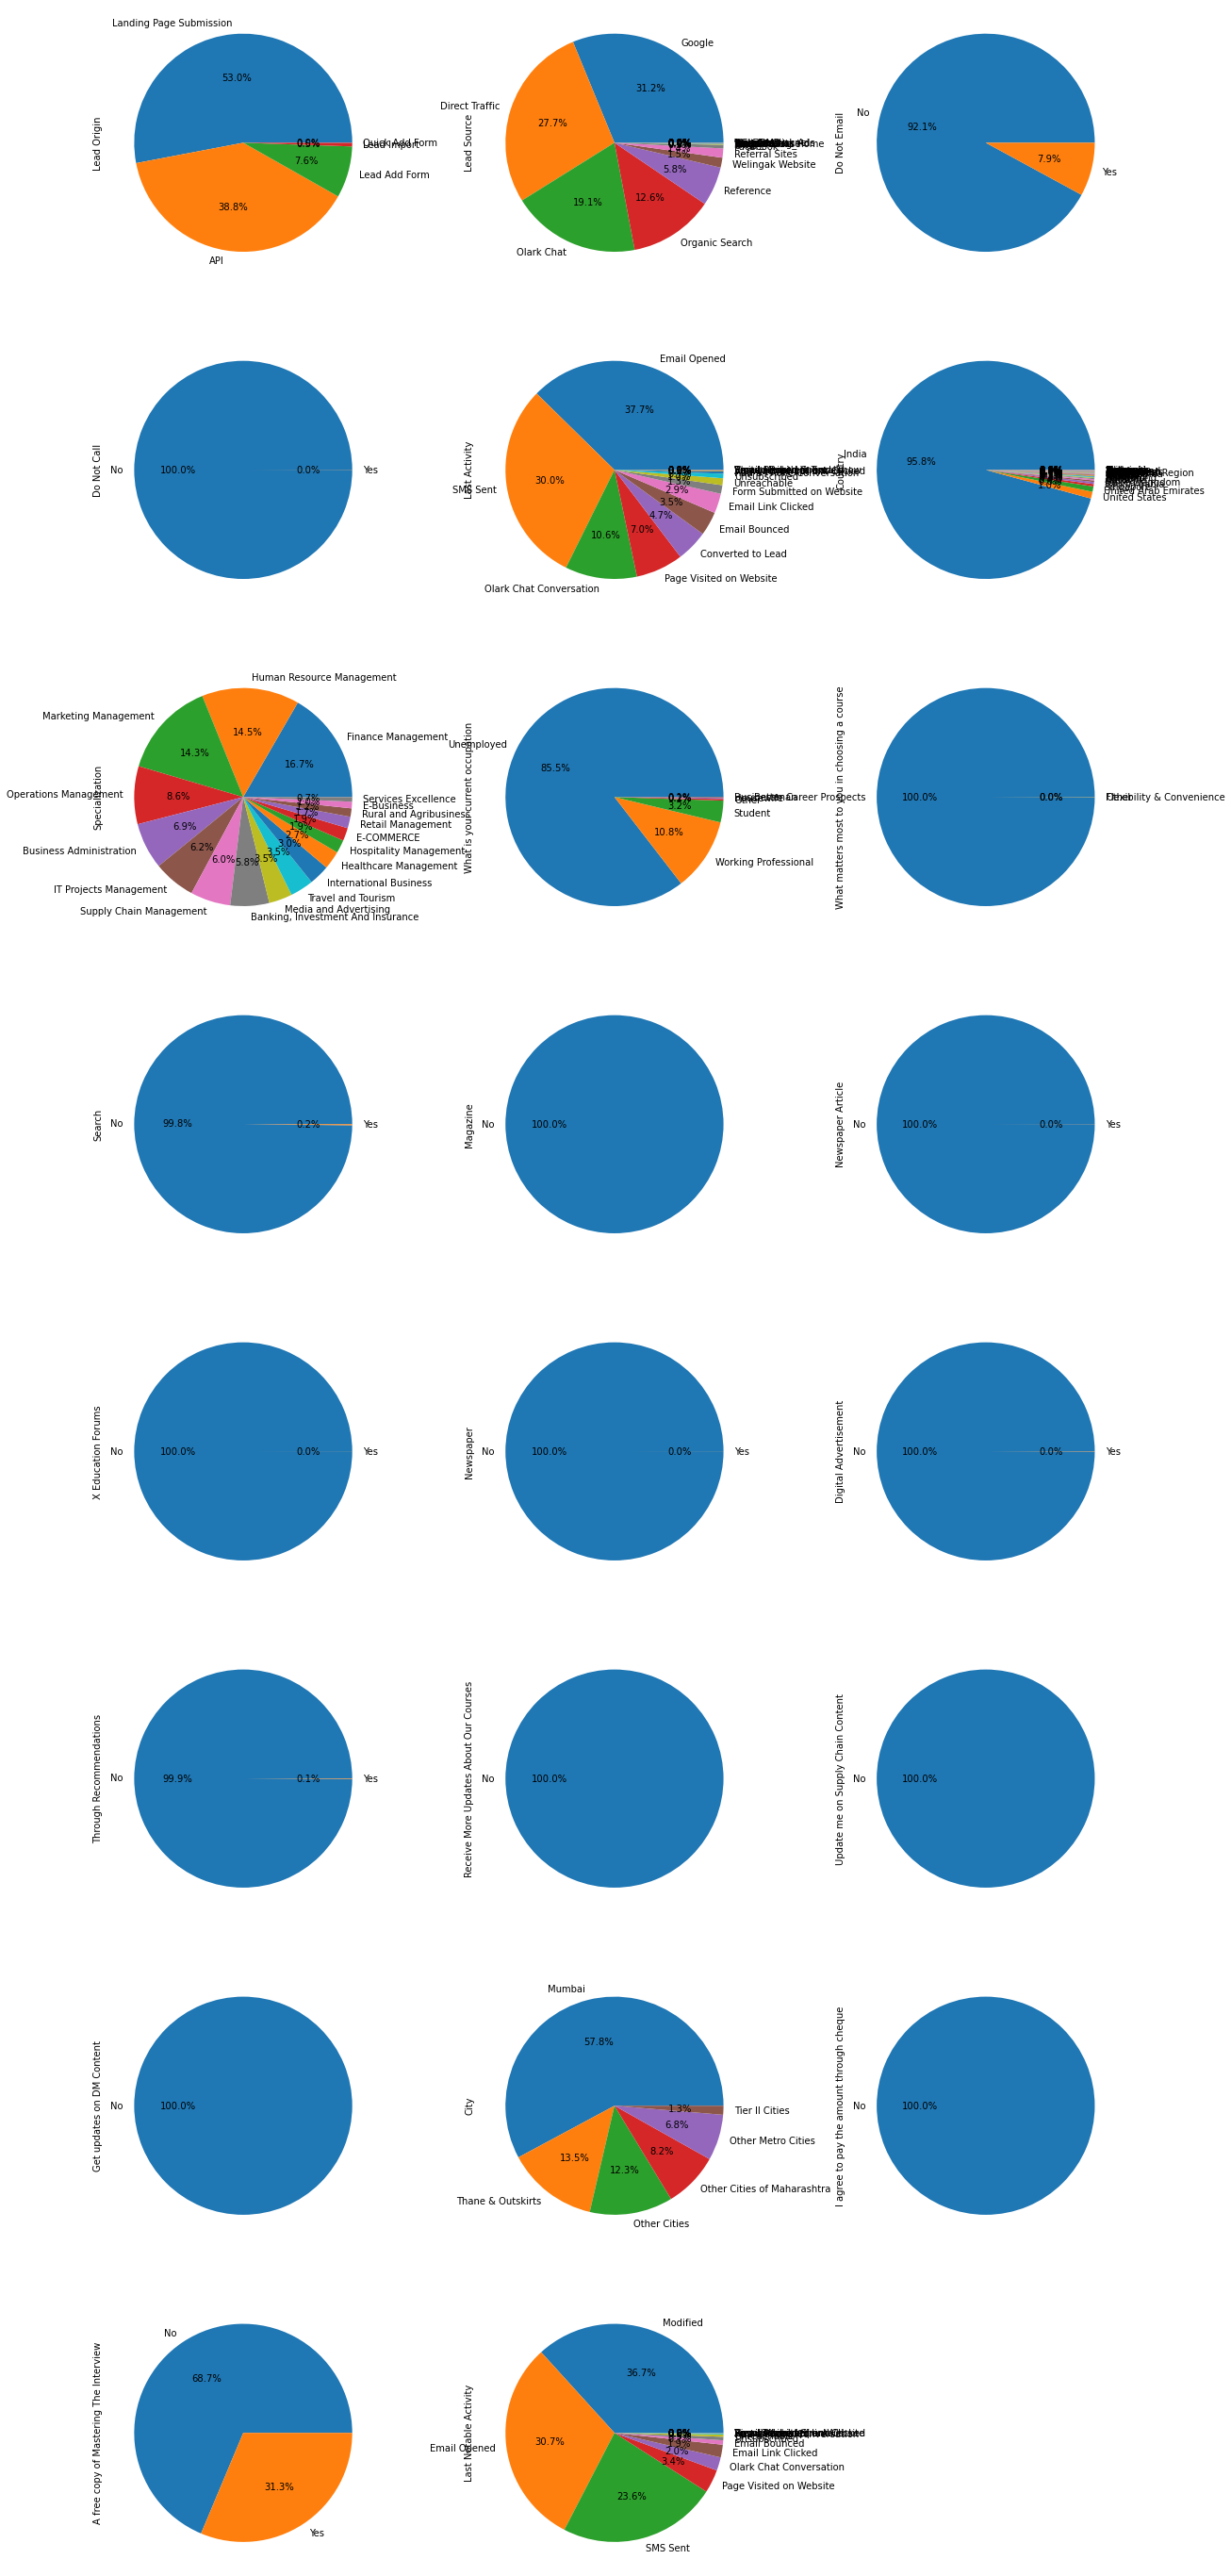

In [15]:
plt.figure(figsize=(20,50))
for colind in range(1,len(cat_col)):
    plt.subplot(8,3,colind)
    lead_data[cat_col[colind]].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

In [16]:
# Observation 0
# following columns are either having only 1 value or heavily skewed (> 99% records have 1 value) hence can be dropped
skewed_cols = ["Do Not Call","What matters most to you in choosing a course","Search","Magazine",
               "Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
               "Through Recommendations","Receive More Updates About Our Courses",
               "Update me on Supply Chain Content","Get updates on DM Content",
               "I agree to pay the amount through cheque","Country"]
# Let's delete all these columns
lead_data.drop(skewed_cols,axis=1,inplace=True)

In [17]:
# Observation 1:
# Lead Origin - "Lead Add Form " (7.6%) + "Lead Import" (.53%) + "Quick Add Form" (.01%) - can be remapped to "Others"
# there are no nulls as well
lead_data["Lead Origin"].value_counts(normalize=True,dropna=False)

Landing Page Submission    0.529935
API                        0.388178
Lead Add Form              0.076464
Lead Import                0.005315
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [18]:
lead_data["Lead Origin"] = lead_data["Lead Origin"].apply(lambda x:"Others" if (x == "Lead Import" or 
                                                                              x == "Quick Add Form" or
                                                                              x == "Lead Add Form") else x)
lead_data["Lead Origin"].value_counts(normalize=True,dropna=False)

Landing Page Submission    0.529935
API                        0.388178
Others                     0.081887
Name: Lead Origin, dtype: float64

In [19]:
# Observation 2:
# Lead Source - "Google" and "google" should be the same, apart from top 4 - let's put everything in others
# Please note NULLs would also be clubbed as Others (just 0.3%)
lead_data["Lead Source"].value_counts(normalize=True,dropna=False)

Google               0.311063
Direct Traffic       0.275813
Olark Chat           0.190239
Organic Search       0.125163
Reference            0.057809
Welingak Website     0.014642
Referral Sites       0.013557
Facebook             0.005315
NaN                  0.003362
bing                 0.000651
google               0.000542
Click2call           0.000434
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
NC_EDM               0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
testone              0.000108
WeLearn              0.000108
blog                 0.000108
Pay per Click Ads    0.000108
Name: Lead Source, dtype: float64

In [20]:
lead_data["Lead Source"] = lead_data["Lead Source"].apply(lambda x:"Google" if (x == "Google" or 
                                                                              x == "google") 
                                                        else x if (x=="Direct Traffic" or
                                                                   x=="Olark Chat" or
                                                                   x=="Organic Search")
                                                       else "Others")
lead_data["Lead Source"].value_counts(normalize=True,dropna=False)

Google            0.311605
Direct Traffic    0.275813
Olark Chat        0.190239
Organic Search    0.125163
Others            0.097180
Name: Lead Source, dtype: float64

In [21]:
# Observation 3
# "Do not email" - this is fine (7.9% Yes, rest No)

In [22]:
# Observation 4
# "Converted" - this is the target variable and is fine (something like 60-40)

In [23]:
# Observation 5:
# Last Activity - apart from top 5 - let's put everything in others
# Please note NULLs would also be clubbed as Others (1%)
lead_data["Last Activity"].value_counts(normalize=True,dropna=False)

Email Opened                    0.372777
SMS Sent                        0.297072
Olark Chat Conversation         0.105423
Page Visited on Website         0.069414
Converted to Lead               0.046421
Email Bounced                   0.035033
Email Link Clicked              0.028959
Form Submitted on Website       0.012581
Unreachable                     0.010087
NaN                             0.010087
Unsubscribed                    0.006616
Had a Phone Conversation        0.003254
Approached upfront              0.000976
View in browser link Clicked    0.000651
Email Marked Spam               0.000217
Email Received                  0.000217
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [24]:
lead_data["Last Activity"] = lead_data["Last Activity"].apply(lambda x:x if (x == "Email Opened" or 
                                                                           x == "SMS Sent" or
                                                                           x == "Olark Chat Conversation" or
                                                                           x == "Page Visited on Website") else "Others")
lead_data["Last Activity"].value_counts(normalize=True,dropna=False)

Email Opened               0.372777
SMS Sent                   0.297072
Others                     0.155315
Olark Chat Conversation    0.105423
Page Visited on Website    0.069414
Name: Last Activity, dtype: float64

In [25]:
# Observation 7:
# Specialization - apart from top 6 - let's keep everything else in "Others"
# Please note NULLs would also be counted in Others (which is 36%)
lead_data["Specialization"].value_counts(normalize=True,dropna=False)

NaN                                  0.364425
Finance Management                   0.105857
Human Resource Management            0.091974
Marketing Management                 0.090889
Operations Management                0.054555
Business Administration              0.043709
IT Projects Management               0.039696
Supply Chain Management              0.037852
Banking, Investment And Insurance    0.036659
Media and Advertising                0.022017
Travel and Tourism                   0.022017
International Business               0.019306
Healthcare Management                0.017245
Hospitality Management               0.012364
E-COMMERCE                           0.012148
Retail Management                    0.010846
Rural and Agribusiness               0.007918
E-Business                           0.006182
Services Excellence                  0.004338
Name: Specialization, dtype: float64

In [26]:
lead_data["Specialization"] = lead_data["Specialization"].apply(lambda x:x if (x == "Finance Management" or 
                                                                             x == "Human Resource Management" or
                                                                             x == "Marketing Management" or
                                                                             x == "Operations Management" or
                                                                             x == "Business Administration" or
                                                                             x == "IT Projects Management") else "Others")
lead_data["Specialization"].value_counts(normalize=True,dropna=False)

Others                       0.573319
Finance Management           0.105857
Human Resource Management    0.091974
Marketing Management         0.090889
Operations Management        0.054555
Business Administration      0.043709
IT Projects Management       0.039696
Name: Specialization, dtype: float64

In [27]:
# Observation 8:
# What is your current occupation - apart from top 3 - let's keep everything else in "Others"
# Please note NULLs (which is around 29%) - should be imputed with Mode value which is "Unemployed"
lead_data["What is your current occupation"].value_counts(normalize=True,dropna=False)

Unemployed              0.605965
NaN                     0.290998
Working Professional    0.076573
Student                 0.022777
Other                   0.001735
Housewife               0.001085
Businessman             0.000868
Name: What is your current occupation, dtype: float64

In [28]:
lead_data["What is your current occupation"] = lead_data["What is your current occupation"].apply(
                                                        lambda x:x if (x == "Unemployed" or 
                                                                       x == "Working Professional" or
                                                                       x == "Student") else 
                                                                       ("Unemployed" if(pd.isnull(x)) else "Others"))
lead_data["What is your current occupation"].value_counts(normalize=True,dropna=False)

Unemployed              0.896963
Working Professional    0.076573
Student                 0.022777
Others                  0.003688
Name: What is your current occupation, dtype: float64

In [29]:
# Observation 9:
# City -
# Biggest portion is with "Mumbai"
# let's put "Thane & Outskirts" into "Other Cities of Maharashtra"
# Then let's put "Other Cities", "Other Metro Cities", Tier II Cities" and NULLs in "Other Cities" (39% NULLs)

lead_data["City"].value_counts(normalize=True,dropna=False)

NaN                            0.396421
Mumbai                         0.349132
Thane & Outskirts              0.081562
Other Cities                   0.074403
Other Cities of Maharashtra    0.049349
Other Metro Cities             0.041106
Tier II Cities                 0.008026
Name: City, dtype: float64

In [30]:
lead_data["City"] = lead_data["City"].apply(lambda x:x if x == "Mumbai"
                                                     else ("Other Cities of Maharashtra" if (x == "Thane & Outskirts" or
                                                                                             x == "Other Cities of Maharashtra")
                                                           else "Other Cities"))
lead_data["City"].value_counts(normalize=True,dropna=False)

Other Cities                   0.519957
Mumbai                         0.349132
Other Cities of Maharashtra    0.130911
Name: City, dtype: float64

In [31]:
# Observation 10:No action required on this column

lead_data["A free copy of Mastering The Interview"].value_counts(normalize=True,dropna=False)

No     0.686768
Yes    0.313232
Name: A free copy of Mastering The Interview, dtype: float64

In [32]:
# Observation 11:
# Last Notable Activity -Le't shave top 3 activities and rest we can put rest in "Others"

lead_data["Last Notable Activity"].value_counts(normalize=True,dropna=False)

Modified                        0.367354
Email Opened                    0.306616
SMS Sent                        0.235575
Page Visited on Website         0.034490
Olark Chat Conversation         0.019848
Email Link Clicked              0.018764
Email Bounced                   0.006508
Unsubscribed                    0.005098
Unreachable                     0.003471
Had a Phone Conversation        0.001518
Email Marked Spam               0.000217
View in browser link Clicked    0.000108
Approached upfront              0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Resubscribed to emails          0.000108
Name: Last Notable Activity, dtype: float64

In [33]:
lead_data["Last Notable Activity"] = lead_data["Last Notable Activity"].apply(lambda x:x if (x == "Modified" or
                                                                                           x == "Email Opened" or
                                                                                           x == "SMS Sent")
                                                                            else "Others")
lead_data["Last Notable Activity"].value_counts(normalize=True,dropna=False)

Modified        0.367354
Email Opened    0.306616
SMS Sent        0.235575
Others          0.090456
Name: Last Notable Activity, dtype: float64

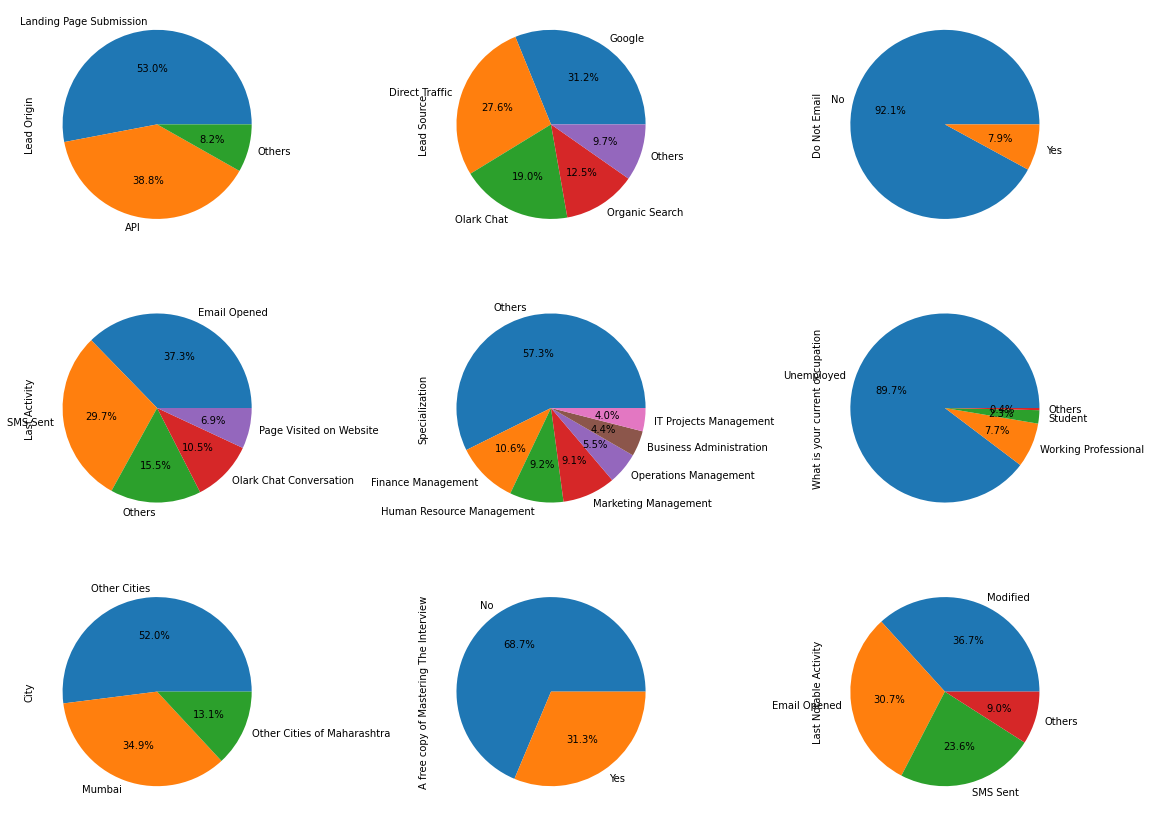

In [34]:
# now's let look at categorical colums again
# first let's refresh the categorical variable list by deleting the columns that have already been deleted
#cat_col = list(set(cat_col).difference(set(skewed_cols)))
cat_col = lead_data.select_dtypes(include = ['object']).columns
plt.figure(figsize=(20,20))
for colind in range(1,len(cat_col)):
    plt.subplot(4,3,colind)
    lead_data[cat_col[colind]].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

#plt.figure(figsize=(16,20))
#for colind in range(1,len(cat_col)):
#    plt.subplot(5,2,colind)
#    sns.countplot(lead_data[cat_col[colind]])
    
#plt.show()

In [35]:
# Let's check for remaining null values - categorical values should have been handled
lead_data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               117
Total Time Spent on Website                 0
Page Views Per Visit                      117
Last Activity                               0
Specialization                              0
What is your current occupation             0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [36]:
# there are outliers - hence best to use median to impute the missing values (rather than mean)
lead_data['TotalVisits'] = lead_data['TotalVisits'].fillna((lead_data['TotalVisits'].median()))
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].fillna((lead_data['Page Views Per Visit'].median()))
lead_data[["TotalVisits","Page Views Per Visit"]].describe([0.25,0.5,0.75,0.9,0.99,0.9999])

,TotalVisits,Page Views Per Visit
count,9220.000000,9220.000000
mean,3.439588,2.358216
std,4.824205,2.148042
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
99%,17.000000,9.000000
99.99%,149.591000,26.421100


In [37]:
# Let's now check how many columns and rows have been retained after cleanup
print("columns retained:",lead_data.shape[1]," out of ",orig_cols,"(",round(100*lead_data.shape[1]/orig_cols,1),"%)")
print("rows retained:",lead_data.shape[0]," out of ",orig_rows,"(",round(100*lead_data.shape[0]/orig_rows,1),"%)")

columns retained: 15  out of  37 ( 40.5 %)
rows retained: 9220  out of  9240 ( 99.8 %)


# <font color="Blue">3. Outlier Handling</font>
(for numeric variables)

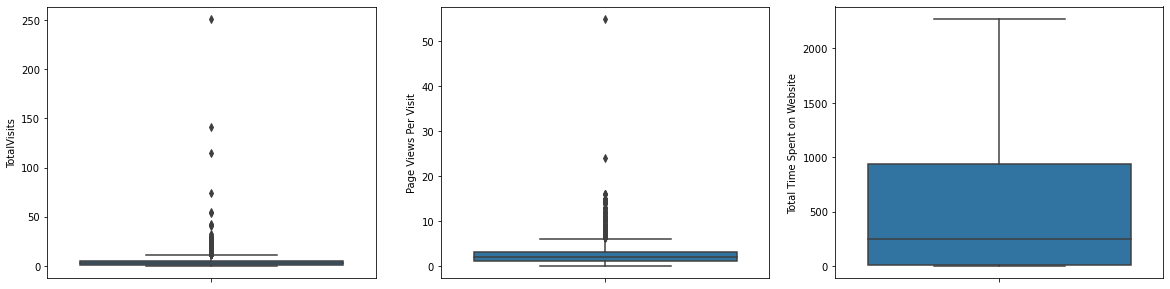

In [38]:
# Let's look at th boxplot for numerical columns
num_col=['TotalVisits','Page Views Per Visit',"Total Time Spent on Website"]
plt.figure(figsize=(20,5))
for colind in range(1,len(num_col)+1):
    plt.subplot(1,3,colind)
    sns.boxplot(y=num_col[colind-1],data=lead_data)
plt.show()

In [39]:
#Let's cap the upper range outliers at 0.95 percentiles
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]
percentiles1 = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles1[0]] = percentiles1[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles1[1]] = percentiles1[1]

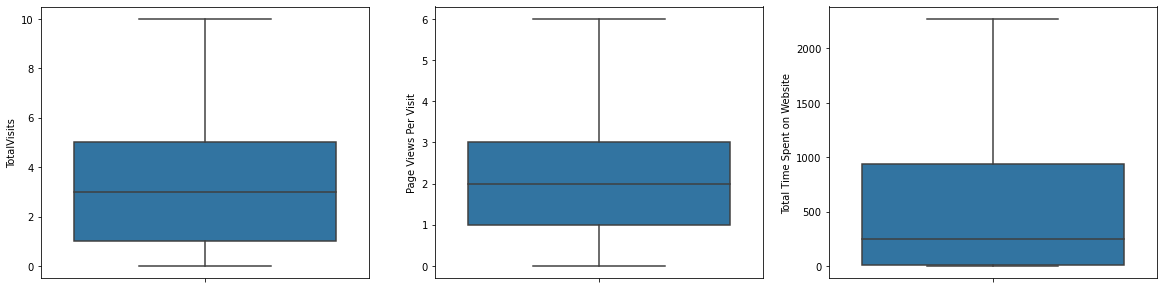

In [40]:
# after capping let's again look at the boxplot
# Let's look at th boxplot for numerical columns
num_col=['TotalVisits','Page Views Per Visit',"Total Time Spent on Website"]
plt.figure(figsize=(20,5))
for colind in range(1,len(num_col)+1):
    plt.subplot(1,3,colind)
    sns.boxplot(y=num_col[colind-1],data=lead_data)
plt.show()
#we can see no more outliers

# <font color="Blue">4. EDA</font>

In [41]:
# Checking Target variable balance percentage
lead_data['Converted'].value_counts(normalize=True)
#roughly balanced around 60:40

0    0.614751
1    0.385249
Name: Converted, dtype: float64

In [42]:
#Checking columns retained
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
#Categorical columns
cat_col = lead_data.select_dtypes(include = ['object']).columns
cat_col

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

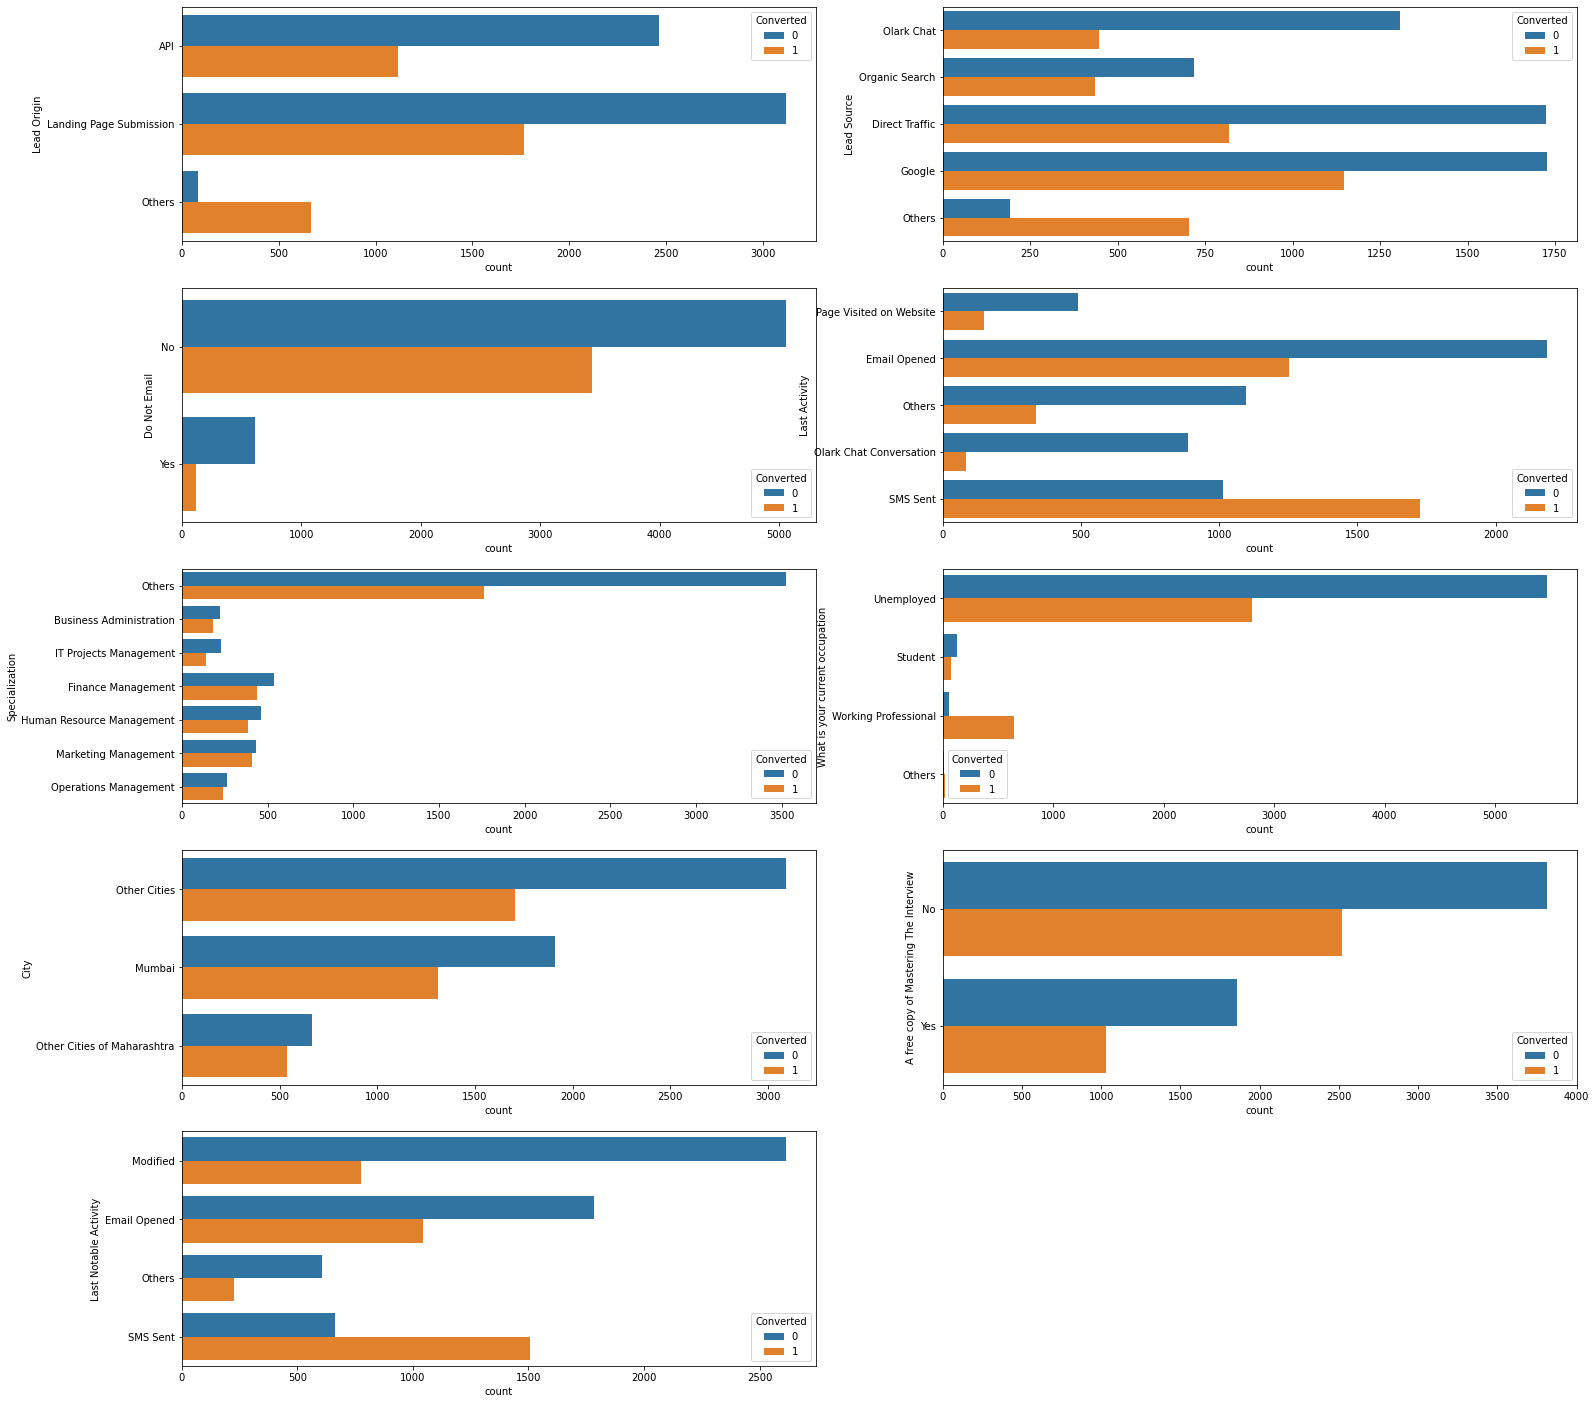

In [44]:
# Visualizing all categorical variables with respect to target variable
plt.figure(figsize=(25,25))
for colind in range(1,len(cat_col)):
    plt.subplot(5,2,colind)
    sns.countplot(y=lead_data[cat_col[colind]], hue=lead_data['Converted'])
    #xticks(rotation=90)
    
plt.show()

#### Inferences:
-Lead Origin:To improve overall lead conversion rate, focus is needed more on improving lead converion of API and Landing Page Submission origin.

-Lead Source: To improve overall lead conversion rate, focus is needed more on improving lead converion of olark chat, organic search, direct traffic, and google leads.( Google and Direct traffic contributing to maximum number of leads)

-Do Not Email: To improve overall lead conversion rate, focus is needed more on customers entering the value as "No". they have better conversion rate.

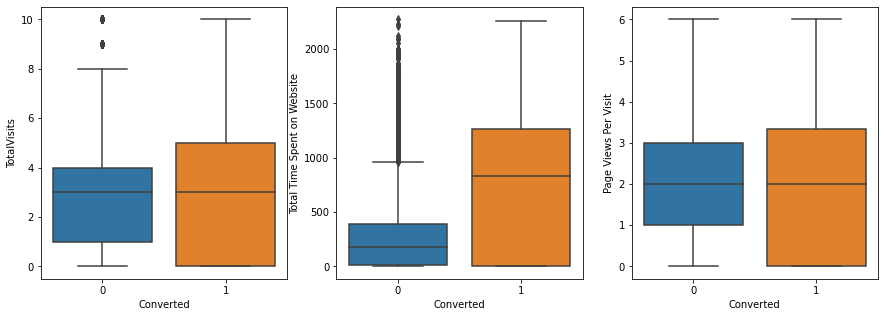

In [45]:
#Looking at numerical columns now
num_col = lead_data.select_dtypes(exclude = ['object']).columns
plt.figure(figsize=(15,5))
for colind in range(3,len(num_col)+1):
    plt.subplot(1,3,colind-2)
    sns.boxplot(y=num_col[colind-1],x='Converted',data=lead_data)
plt.show()

#### Inferences:
-Lead spending more time on the website are more likely to be converted. Hence website should be made more engaging to increase conversions.

# <font color="Blue">5. Data Preparation</font>

In [46]:
# for the columns "Do Not Email","A free copy of Mastering The Interview" - we have to change data to 0/1
lead_data["Do Not Email"]                           = lead_data["Do Not Email"].map({"Yes":1,"No":0})
lead_data["A free copy of Mastering The Interview"] = lead_data["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [47]:
lead_data["Do Not Email"].value_counts()

0    8489
1     731
Name: Do Not Email, dtype: int64

In [48]:
lead_data["A free copy of Mastering The Interview"].value_counts()

0    6332
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [49]:
# shape of the dataframe before adding dummies
lead_data.shape

(9220, 15)

In [50]:
# for other categorical variables we have to add dummies
dummy_cols = ["City","Lead Origin","Last Notable Activity","What is your current occupation",
              "Last Activity","Lead Source","Specialization"]
lead_data = pd.concat([lead_data,
                      pd.get_dummies(lead_data[dummy_cols],drop_first=True)],
                      axis=1)
lead_data.drop(dummy_cols,axis=1,inplace=True)

In [51]:
# shape of the dataframe after adding dummies
lead_data.shape

(9220, 32)

In [52]:
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,Lead Origin_Landing Page Submission,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


# <font color="Blue">6. Train - Test Split & Scaling</font>

In [53]:
X= lead_data.drop(['Prospect ID','Converted','Lead Number'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,Lead Origin_Landing Page Submission,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others
0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,2.0,1428,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [54]:
y=lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
#Scaling continuous columns
scaler =StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,Lead Origin_Landing Page Submission,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others
6159,0,-0.069681,-0.826217,0.423649,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3918,0,0.290384,1.178640,0.989023,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2190,1,2.450777,-0.350519,2.119771,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4281,0,2.090711,1.371835,2.119771,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8886,0,-0.429746,1.473901,-0.707100,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1


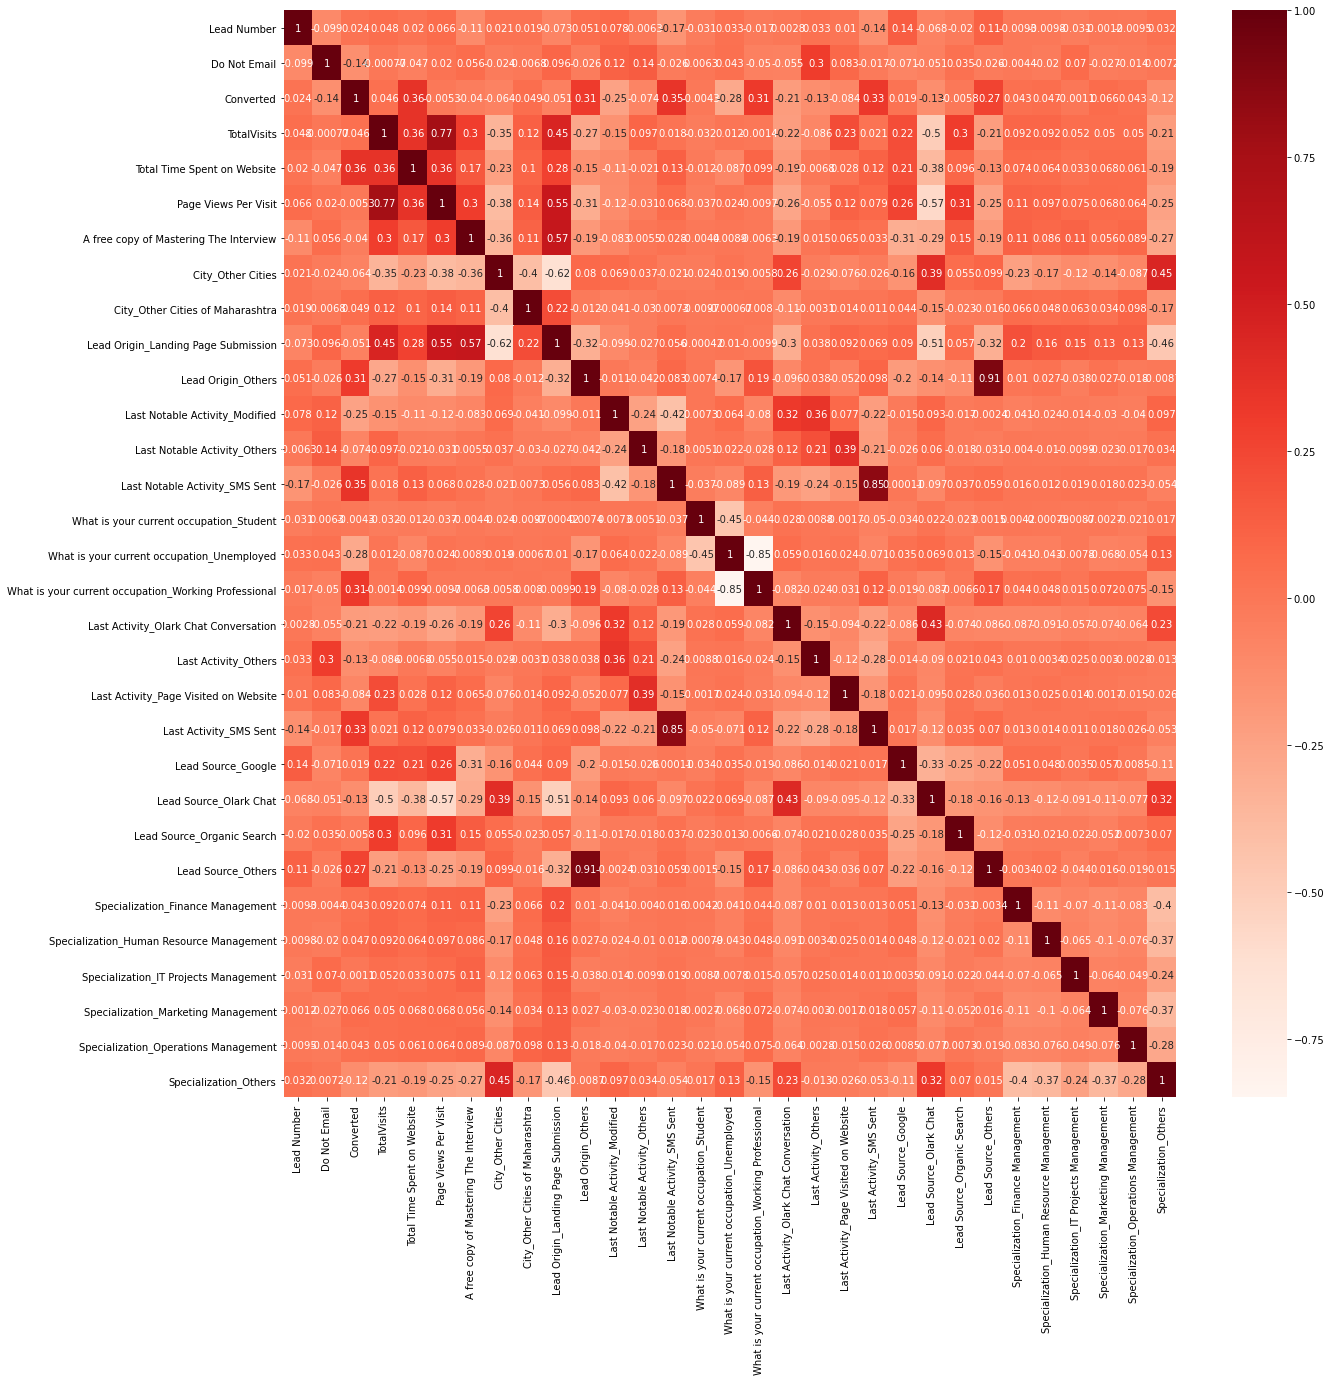

In [57]:
#Checking correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(lead_data.corr(),cmap="Reds",annot = True)
plt.show()

In [58]:
# Dropping highly correlated variables
X_test = X_test.drop(['Lead Source_Others','Last Notable Activity_SMS Sent','What is your current occupation_Unemployed'], 1)
X_train = X_train.drop(['Lead Source_Others','Last Notable Activity_SMS Sent','What is your current occupation_Unemployed'], 1)

In [59]:
# finally left with 28 columns
X_train.shape

(6454, 26)

# <font color="Blue">7. Model Creation (Mixed : Automated + Manual - to arrive at the right features)</font>

In [60]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.7
Date:                Sun, 06 Sep 2020   Deviance:                       5497.5
Time:                        12:05:08   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7706      0.224     -3.438      0.001      -1.210      -0.331
Do Not Email                                            -1.1218      0.164     -6.858      0.000      -1.442      -0.801
TotalVisits                                              0.2765      0.054      5.139      0.000       0.171       0.382
Total Time Spent on Website                              1.0374      0.039     26.637      0.000       0.961       1.114
Page Views Per Visit                                    -0.2924      0.060     -4.876      0.000      -0.410      -0.175
A free copy of Mastering The Interview                  -0.1351      0.102     -1.322      0.186      -0.335       0.065
City_Other Cities                                       -0.1803      0.098     -1.849      0.064      -0.371       0.011
City_Other Cities of Maharashtra                         0.0055      0.107      0.052      0.959      -0.204       0.215
Lead Origin_Landing Page Submission                     -0.3270      0.120     -2.733      0.006      -0.562      -0.092
Lead Origin_Others                                       3.4147      0.204     16.779      0.000       3.016       3.814
Last Notable Activity_Modified                          -0.8245      0.101     -8.190      0.000      -1.022      -0.627
Last Notable Activity_Others                             0.0480      0.183      0.263      0.793      -0.310       0.406
What is your current occupation_Student                  0.5470      0.223      2.453      0.014       0.110       0.984
What is your current occupation_Working Professional     2.7244      0.194     14.071      0.000       2.345       3.104
Last Activity_Olark Chat Conversation                   -1.0314      0.192     -5.379      0.000      -1.407      -0.656
Last Activity_Others                                    -0.1575      0.152     -1.035      0.301      -0.456       0.141
Last Activity_Page Visited on Website                   -0.4890      0.200     -2.440      0.015      -0.882      -0.096
Last Activity_SMS Sent                                   1.2552      0.079     15.887      0.000       1.100       1.410
Lead Source_Google                                       0.1973      0.108      1.822      0.069      -0.015       0.410
Lead Source_Olark Chat                                   1.0070      0.155      6.478      0.000       0.702       1.312
Lead Source_Organic Search                               0.2648      0.124      2.139      0.032       0.022       0.507
Specialization_Finance Management                        0.0498      0.188      0.265      0.791      -0.318       0.418
Specialization_Human Resource Management                 0

### <font color="Green">7.1> First we would build an Automated model i.e. feature selection automated using RFE</font>

In [61]:
#Feature Selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
# the following array shows True for all columns that were selected by RFE
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [63]:
# let's have a look at all the column names against their selection and rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Others', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Man

In [64]:
# let's enlist the 25 selected columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'City_Other Cities', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Others', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others'],
      dtype='object')

In [65]:
# Enlisting columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['City_Other Cities of Maharashtra'], dtype='object')

In [66]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.7
Date:                Sun, 06 Sep 2020   Deviance:                       5497.5
Time:                        12:05:08   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7689      0.222     -3.468      0.001      -1.203      -0.334
Do Not Email                                            -1.1219      0.164     -6.859      0.000      -1.442      -0.801
TotalVisits                                              0.2765      0.054      5.139      0.000       0.171       0.382
Total Time Spent on Website                              1.0374      0.039     26.646      0.000       0.961       1.114
Page Views Per Visit                                    -0.2924      0.060     -4.877      0.000      -0.410      -0.175
A free copy of Mastering The Interview                  -0.1354      0.102     -1.327      0.184      -0.335       0.065
City_Other Cities                                       -0.1820      0.092     -1.974      0.048      -0.363      -0.001
Lead Origin_Landing Page Submission                     -0.3270      0.120     -2.733      0.006      -0.562      -0.092
Lead Origin_Others                                       3.4147      0.204     16.779      0.000       3.016       3.814
Last Notable Activity_Modified                          -0.8246      0.101     -8.192      0.000      -1.022      -0.627
Last Notable Activity_Others                             0.0479      0.183      0.262      0.793      -0.311       0.406
What is your current occupation_Student                  0.5469      0.223      2.453      0.014       0.110       0.984
What is your current occupation_Working Professional     2.7247      0.194     14.075      0.000       2.345       3.104
Last Activity_Olark Chat Conversation                   -1.0314      0.192     -5.379      0.000      -1.407      -0.656
Last Activity_Others                                    -0.1575      0.152     -1.035      0.301      -0.456       0.141
Last Activity_Page Visited on Website                   -0.4889      0.200     -2.439      0.015      -0.882      -0.096
Last Activity_SMS Sent                                   1.2552      0.079     15.888      0.000       1.100       1.410
Lead Source_Google                                       0.1971      0.108      1.821      0.069      -0.015       0.409
Lead Source_Olark Chat                                   1.0069      0.155      6.478      0.000       0.702       1.312
Lead Source_Organic Search                               0.2648      0.124      2.138      0.032       0.022       0.507
Specialization_Finance Management                        0.0497      0.188      0.264      0.791      -0.318       0.418
Specialization_Human Resource Management                 0.0593      0.190      0.312      0.755      -0.313       0.432
Specialization_IT Projects Management                    0

### <font color="Green">7.2> Model 2 : Delete "Last Notable Activity_Others" - p value 0.793</font>

In [67]:
#Let's again build the model after removing this column and see the summary
col1=col.drop("Last Notable Activity_Others")
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.8
Date:                Sun, 06 Sep 2020   Deviance:                       5497.5
Time:                        12:05:08   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7676      0.222     -3.463      0.001      -1.202      -0.333
Do Not Email                                            -1.1192      0.163     -6.857      0.000      -1.439      -0.799
TotalVisits                                              0.2781      0.053      5.203      0.000       0.173       0.383
Total Time Spent on Website                              1.0375      0.039     26.649      0.000       0.961       1.114
Page Views Per Visit                                    -0.2932      0.060     -4.897      0.000      -0.411      -0.176
A free copy of Mastering The Interview                  -0.1350      0.102     -1.324      0.186      -0.335       0.065
City_Other Cities                                       -0.1812      0.092     -1.967      0.049      -0.362      -0.001
Lead Origin_Landing Page Submission                     -0.3271      0.120     -2.734      0.006      -0.562      -0.093
Lead Origin_Others                                       3.4162      0.203     16.789      0.000       3.017       3.815
Last Notable Activity_Modified                          -0.8389      0.085     -9.923      0.000      -1.005      -0.673
What is your current occupation_Student                  0.5466      0.223      2.451      0.014       0.110       0.984
What is your current occupation_Working Professional     2.7247      0.194     14.078      0.000       2.345       3.104
Last Activity_Olark Chat Conversation                   -1.0097      0.173     -5.846      0.000      -1.348      -0.671
Last Activity_Others                                    -0.1340      0.123     -1.092      0.275      -0.374       0.106
Last Activity_Page Visited on Website                   -0.4569      0.159     -2.880      0.004      -0.768      -0.146
Last Activity_SMS Sent                                   1.2563      0.079     15.917      0.000       1.102       1.411
Lead Source_Google                                       0.1975      0.108      1.825      0.068      -0.015       0.410
Lead Source_Olark Chat                                   1.0087      0.155      6.496      0.000       0.704       1.313
Lead Source_Organic Search                               0.2640      0.124      2.133      0.033       0.021       0.507
Specialization_Finance Management                        0.0501      0.188      0.267      0.790      -0.318       0.418
Specialization_Human Resource Management                 0.0587      0.190      0.309      0.757      -0.314       0.431
Specialization_IT Projects Management                    0.0963      0.232      0.415      0.678      -0.358       0.551
Specialization_Marketing Management                      0

### <font color="Green">7.3> Model 3 : Delete "Specialization_Finance Management" p-value 0.790</font>

In [68]:
#Let's again build the model after removing this column and see the summary
col2=col1.drop("Specialization_Finance Management")
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.8
Date:                Sun, 06 Sep 2020   Deviance:                       5497.6
Time:                        12:05:08   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7318      0.176     -4.153      0.000      -1.077      -0.386
Do Not Email                                            -1.1204      0.163     -6.866      0.000      -1.440      -0.801
TotalVisits                                              0.2779      0.053      5.199      0.000       0.173       0.383
Total Time Spent on Website                              1.0374      0.039     26.649      0.000       0.961       1.114
Page Views Per Visit                                    -0.2930      0.060     -4.895      0.000      -0.410      -0.176
A free copy of Mastering The Interview                  -0.1347      0.102     -1.321      0.186      -0.335       0.065
City_Other Cities                                       -0.1827      0.092     -1.987      0.047      -0.363      -0.002
Lead Origin_Landing Page Submission                     -0.3279      0.120     -2.742      0.006      -0.562      -0.093
Lead Origin_Others                                       3.4164      0.203     16.790      0.000       3.018       3.815
Last Notable Activity_Modified                          -0.8394      0.085     -9.932      0.000      -1.005      -0.674
What is your current occupation_Student                  0.5472      0.223      2.455      0.014       0.110       0.984
What is your current occupation_Working Professional     2.7254      0.194     14.080      0.000       2.346       3.105
Last Activity_Olark Chat Conversation                   -1.0090      0.173     -5.843      0.000      -1.347      -0.671
Last Activity_Others                                    -0.1329      0.123     -1.084      0.278      -0.373       0.107
Last Activity_Page Visited on Website                   -0.4574      0.159     -2.883      0.004      -0.768      -0.146
Last Activity_SMS Sent                                   1.2562      0.079     15.918      0.000       1.102       1.411
Lead Source_Google                                       0.1976      0.108      1.826      0.068      -0.015       0.410
Lead Source_Olark Chat                                   1.0088      0.155      6.497      0.000       0.704       1.313
Lead Source_Organic Search                               0.2639      0.124      2.132      0.033       0.021       0.507
Specialization_Human Resource Management                 0.0237      0.137      0.172      0.863      -0.246       0.293
Specialization_IT Projects Management                    0.0613      0.191      0.320      0.749      -0.314       0.436
Specialization_Marketing Management                      0.2180      0.138      1.576      0.115      -0.053       0.489
Specialization_Operations Management                     0

### <font color="Green">7.4> Model 4 : Delete "Specialization_Human Resource Management" p-value 0.863</font>

In [69]:
#Let's again build the model after removing this column and see the summary
col3=col2.drop("Specialization_Human Resource Management")
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.8
Date:                Sun, 06 Sep 2020   Deviance:                       5497.6
Time:                        12:05:08   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7226      0.168     -4.303      0.000      -1.052      -0.393
Do Not Email                                            -1.1205      0.163     -6.866      0.000      -1.440      -0.801
TotalVisits                                              0.2779      0.053      5.199      0.000       0.173       0.383
Total Time Spent on Website                              1.0376      0.039     26.659      0.000       0.961       1.114
Page Views Per Visit                                    -0.2928      0.060     -4.892      0.000      -0.410      -0.175
A free copy of Mastering The Interview                  -0.1346      0.102     -1.320      0.187      -0.334       0.065
City_Other Cities                                       -0.1825      0.092     -1.985      0.047      -0.363      -0.002
Lead Origin_Landing Page Submission                     -0.3282      0.120     -2.745      0.006      -0.563      -0.094
Lead Origin_Others                                       3.4170      0.203     16.795      0.000       3.018       3.816
Last Notable Activity_Modified                          -0.8393      0.085     -9.931      0.000      -1.005      -0.674
What is your current occupation_Student                  0.5473      0.223      2.455      0.014       0.110       0.984
What is your current occupation_Working Professional     2.7251      0.194     14.081      0.000       2.346       3.104
Last Activity_Olark Chat Conversation                   -1.0093      0.173     -5.844      0.000      -1.348      -0.671
Last Activity_Others                                    -0.1327      0.123     -1.082      0.279      -0.373       0.108
Last Activity_Page Visited on Website                   -0.4572      0.159     -2.882      0.004      -0.768      -0.146
Last Activity_SMS Sent                                   1.2562      0.079     15.918      0.000       1.102       1.411
Lead Source_Google                                       0.1977      0.108      1.827      0.068      -0.014       0.410
Lead Source_Olark Chat                                   1.0093      0.155      6.501      0.000       0.705       1.314
Lead Source_Organic Search                               0.2639      0.124      2.131      0.033       0.021       0.506
Specialization_IT Projects Management                    0.0521      0.184      0.284      0.777      -0.308       0.412
Specialization_Marketing Management                      0.2087      0.127      1.638      0.101      -0.041       0.458
Specialization_Operations Management                     0.0335      0.159      0.210      0.834      -0.279       0.346
Specialization_Others                                   -0

### <font color="Green">7.5> Model 5 : Delete "Specialization_Operations Management" p-value 0.834</font>

In [70]:
#Let's again build the model after removing this column and see the summary
col4=col3.drop("Specialization_Operations Management")
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.8
Date:                Sun, 06 Sep 2020   Deviance:                       5497.7
Time:                        12:05:08   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7170      0.166     -4.324      0.000      -1.042      -0.392
Do Not Email                                            -1.1210      0.163     -6.870      0.000      -1.441      -0.801
TotalVisits                                              0.2777      0.053      5.196      0.000       0.173       0.382
Total Time Spent on Website                              1.0376      0.039     26.660      0.000       0.961       1.114
Page Views Per Visit                                    -0.2927      0.060     -4.891      0.000      -0.410      -0.175
A free copy of Mastering The Interview                  -0.1341      0.102     -1.316      0.188      -0.334       0.066
City_Other Cities                                       -0.1816      0.092     -1.977      0.048      -0.362      -0.002
Lead Origin_Landing Page Submission                     -0.3283      0.120     -2.746      0.006      -0.563      -0.094
Lead Origin_Others                                       3.4164      0.203     16.794      0.000       3.018       3.815
Last Notable Activity_Modified                          -0.8389      0.084     -9.929      0.000      -1.005      -0.673
What is your current occupation_Student                  0.5465      0.223      2.452      0.014       0.110       0.983
What is your current occupation_Working Professional     2.7259      0.193     14.090      0.000       2.347       3.105
Last Activity_Olark Chat Conversation                   -1.0093      0.173     -5.844      0.000      -1.348      -0.671
Last Activity_Others                                    -0.1328      0.123     -1.083      0.279      -0.373       0.107
Last Activity_Page Visited on Website                   -0.4577      0.159     -2.885      0.004      -0.769      -0.147
Last Activity_SMS Sent                                   1.2566      0.079     15.925      0.000       1.102       1.411
Lead Source_Google                                       0.1974      0.108      1.824      0.068      -0.015       0.409
Lead Source_Olark Chat                                   1.0090      0.155      6.499      0.000       0.705       1.313
Lead Source_Organic Search                               0.2639      0.124      2.132      0.033       0.021       0.507
Specialization_IT Projects Management                    0.0461      0.182      0.254      0.799      -0.310       0.402
Specialization_Marketing Management                      0.2027      0.124      1.633      0.103      -0.041       0.446
Specialization_Others                                   -0.3372      0.088     -3.815      0.000      -0.510      -0.164
==========================================================

### <font color="Green">7.6> Model 6 : Delete "Specialization_IT Projects Management" p-value 0.799</font>

In [71]:
#Let's again build the model after removing this column and see the summary
col5=col4.drop("Specialization_IT Projects Management")
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.9
Date:                Sun, 06 Sep 2020   Deviance:                       5497.8
Time:                        12:05:08   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7112      0.164     -4.330      0.000      -1.033      -0.389
Do Not Email                                            -1.1204      0.163     -6.866      0.000      -1.440      -0.801
TotalVisits                                              0.2775      0.053      5.193      0.000       0.173       0.382
Total Time Spent on Website                              1.0373      0.039     26.667      0.000       0.961       1.114
Page Views Per Visit                                    -0.2927      0.060     -4.891      0.000      -0.410      -0.175
A free copy of Mastering The Interview                  -0.1337      0.102     -1.312      0.190      -0.334       0.066
City_Other Cities                                       -0.1815      0.092     -1.976      0.048      -0.362      -0.001
Lead Origin_Landing Page Submission                     -0.3286      0.120     -2.748      0.006      -0.563      -0.094
Lead Origin_Others                                       3.4147      0.203     16.795      0.000       3.016       3.813
Last Notable Activity_Modified                          -0.8392      0.084     -9.933      0.000      -1.005      -0.674
What is your current occupation_Student                  0.5461      0.223      2.450      0.014       0.109       0.983
What is your current occupation_Working Professional     2.7254      0.193     14.090      0.000       2.346       3.104
Last Activity_Olark Chat Conversation                   -1.0088      0.173     -5.842      0.000      -1.347      -0.670
Last Activity_Others                                    -0.1326      0.123     -1.082      0.279      -0.373       0.108
Last Activity_Page Visited on Website                   -0.4574      0.159     -2.883      0.004      -0.768      -0.146
Last Activity_SMS Sent                                   1.2567      0.079     15.927      0.000       1.102       1.411
Lead Source_Google                                       0.1968      0.108      1.819      0.069      -0.015       0.409
Lead Source_Olark Chat                                   1.0073      0.155      6.495      0.000       0.703       1.311
Lead Source_Organic Search                               0.2631      0.124      2.126      0.033       0.021       0.506
Specialization_Marketing Management                      0.1975      0.122      1.613      0.107      -0.042       0.438
Specialization_Others                                   -0.3422      0.086     -3.972      0.000      -0.511      -0.173
========================================================================================================================
"""

In [72]:
#Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,3.95
3,Page Views Per Visit,3.27
19,Specialization_Others,3.20
5,City_Other Cities,3.10
1,TotalVisits,2.73
4,A free copy of Mastering The Interview,2.68
16,Lead Source_Olark Chat,2.66
8,Last Notable Activity_Modified,2.25
15,Lead Source_Google,2.12
12,Last Activity_Others,1.95


### <font color="Green">7.7> Model 7 : Delete "Last Activity_Others" p-value 0.279</font>

In [73]:
#Let's again build the model after removing this column and see the summary
col6=col5.drop("Last Activity_Others")
X_train_sm = sm.add_constant(X_train[col6])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.5
Date:                Sun, 06 Sep 2020   Deviance:                       5498.9
Time:                        12:05:08   Pearson chi2:                 6.98e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7302      0.163     -4.472      0.000      -1.050      -0.410
Do Not Email                                            -1.1595      0.159     -7.298      0.000      -1.471      -0.848
TotalVisits                                              0.2783      0.053      5.210      0.000       0.174       0.383
Total Time Spent on Website                              1.0366      0.039     26.655      0.000       0.960       1.113
Page Views Per Visit                                    -0.2885      0.060     -4.832      0.000      -0.406      -0.171
A free copy of Mastering The Interview                  -0.1334      0.102     -1.310      0.190      -0.333       0.066
City_Other Cities                                       -0.1802      0.092     -1.962      0.050      -0.360      -0.000
Lead Origin_Landing Page Submission                     -0.3310      0.119     -2.771      0.006      -0.565      -0.097
Lead Origin_Others                                       3.4151      0.203     16.792      0.000       3.016       3.814
Last Notable Activity_Modified                          -0.8710      0.079    -10.988      0.000      -1.026      -0.716
What is your current occupation_Student                  0.5522      0.223      2.479      0.013       0.116       0.989
What is your current occupation_Working Professional     2.7206      0.193     14.081      0.000       2.342       3.099
Last Activity_Olark Chat Conversation                   -0.9679      0.169     -5.739      0.000      -1.298      -0.637
Last Activity_Page Visited on Website                   -0.4235      0.156     -2.720      0.007      -0.729      -0.118
Last Activity_SMS Sent                                   1.2853      0.074     17.258      0.000       1.139       1.431
Lead Source_Google                                       0.1965      0.108      1.818      0.069      -0.015       0.408
Lead Source_Olark Chat                                   1.0134      0.155      6.540      0.000       0.710       1.317
Lead Source_Organic Search                               0.2583      0.124      2.089      0.037       0.016       0.501
Specialization_Marketing Management                      0.1970      0.122      1.610      0.107      -0.043       0.437
Specialization_Others                                   -0.3426      0.086     -3.976      0.000      -0.511      -0.174
========================================================================================================================
"""

In [74]:
#Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Origin_Landing Page Submission,3.87
3,Page Views Per Visit,3.25
18,Specialization_Others,3.19
5,City_Other Cities,3.09
1,TotalVisits,2.73
4,A free copy of Mastering The Interview,2.68
15,Lead Source_Olark Chat,2.66
14,Lead Source_Google,2.10
8,Last Notable Activity_Modified,1.84
13,Last Activity_SMS Sent,1.62


### <font color="Green">7.8> Model 8 : Delete "A free copy of Mastering The Interview" p-value 0.190</font>

In [75]:
#Let's again build the model after removing this column and see the summary
col7=col6.drop("A free copy of Mastering The Interview")
X_train_sm = sm.add_constant(X_train[col7])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.3
Date:                Sun, 06 Sep 2020   Deviance:                       5500.6
Time:                        12:05:09   Pearson chi2:                 6.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8042      0.153     -5.249      0.000      -1.105      -0.504
Do Not Email                                            -1.1524      0.159     -7.258      0.000      -1.464      -0.841
TotalVisits                                              0.2717      0.053      5.108      0.000       0.167       0.376
Total Time Spent on Website                              1.0351      0.039     26.640      0.000       0.959       1.111
Page Views Per Visit                                    -0.2837      0.060     -4.761      0.000      -0.400      -0.167
City_Other Cities                                       -0.1702      0.091     -1.862      0.063      -0.349       0.009
Lead Origin_Landing Page Submission                     -0.3661      0.116     -3.144      0.002      -0.594      -0.138
Lead Origin_Others                                       3.4724      0.199     17.471      0.000       3.083       3.862
Last Notable Activity_Modified                          -0.8705      0.079    -10.981      0.000      -1.026      -0.715
What is your current occupation_Student                  0.5551      0.223      2.492      0.013       0.119       0.992
What is your current occupation_Working Professional     2.7216      0.193     14.082      0.000       2.343       3.100
Last Activity_Olark Chat Conversation                   -0.9676      0.169     -5.732      0.000      -1.298      -0.637
Last Activity_Page Visited on Website                   -0.4206      0.156     -2.703      0.007      -0.726      -0.116
Last Activity_SMS Sent                                   1.2844      0.074     17.253      0.000       1.138       1.430
Lead Source_Google                                       0.2714      0.092      2.954      0.003       0.091       0.451
Lead Source_Olark Chat                                   1.0640      0.150      7.079      0.000       0.769       1.359
Lead Source_Organic Search                               0.2783      0.123      2.268      0.023       0.038       0.519
Specialization_Marketing Management                      0.1996      0.122      1.631      0.103      -0.040       0.439
Specialization_Others                                   -0.3357      0.086     -3.907      0.000      -0.504      -0.167
========================================================================================================================
"""

### <font color="Green">7.9> Model 9 : Delete "Specialization_Marketing Management" p-value 0.103</font>

In [76]:
#Let's again build the model after removing this column and see the summary
col8=col7.drop("Specialization_Marketing Management")
X_train_sm = sm.add_constant(X_train[col8])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2751.7
Date:                Sun, 06 Sep 2020   Deviance:                       5503.3
Time:                        12:05:09   Pearson chi2:                 6.96e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7521      0.150     -5.024      0.000      -1.045      -0.459
Do Not Email                                            -1.1565      0.159     -7.287      0.000      -1.468      -0.845
TotalVisits                                              0.2701      0.053      5.079      0.000       0.166       0.374
Total Time Spent on Website                              1.0346      0.039     26.633      0.000       0.958       1.111
Page Views Per Visit                                    -0.2824      0.060     -4.741      0.000      -0.399      -0.166
City_Other Cities                                       -0.1699      0.091     -1.858      0.063      -0.349       0.009
Lead Origin_Landing Page Submission                     -0.3732      0.116     -3.207      0.001      -0.601      -0.145
Lead Origin_Others                                       3.4691      0.199     17.463      0.000       3.080       3.858
Last Notable Activity_Modified                          -0.8692      0.079    -10.970      0.000      -1.025      -0.714
What is your current occupation_Student                  0.5479      0.223      2.459      0.014       0.111       0.985
What is your current occupation_Working Professional     2.7195      0.193     14.062      0.000       2.340       3.099
Last Activity_Olark Chat Conversation                   -0.9657      0.169     -5.723      0.000      -1.296      -0.635
Last Activity_Page Visited on Website                   -0.4203      0.155     -2.704      0.007      -0.725      -0.116
Last Activity_SMS Sent                                   1.2828      0.074     17.240      0.000       1.137       1.429
Lead Source_Google                                       0.2697      0.092      2.936      0.003       0.090       0.450
Lead Source_Olark Chat                                   1.0571      0.150      7.039      0.000       0.763       1.351
Lead Source_Organic Search                               0.2700      0.123      2.204      0.028       0.030       0.510
Specialization_Others                                   -0.3811      0.081     -4.692      0.000      -0.540      -0.222
========================================================================================================================
"""

### <font color="Green">7.10> Model 10 : Delete "City_Other Cities" p-value 0.063</font>

In [77]:
#Let's again build the model after removing this column and see the summary
col9=col8.drop("City_Other Cities")
X_train_sm = sm.add_constant(X_train[col9])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2753.4
Date:                Sun, 06 Sep 2020   Deviance:                       5506.8
Time:                        12:05:09   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8796      0.133     -6.611      0.000      -1.140      -0.619
Do Not Email                                            -1.1637      0.159     -7.330      0.000      -1.475      -0.853
TotalVisits                                              0.2784      0.053      5.259      0.000       0.175       0.382
Total Time Spent on Website                              1.0371      0.039     26.731      0.000       0.961       1.113
Page Views Per Visit                                    -0.2779      0.059     -4.671      0.000      -0.395      -0.161
Lead Origin_Landing Page Submission                     -0.2833      0.106     -2.682      0.007      -0.490      -0.076
Lead Origin_Others                                       3.5322      0.196     18.008      0.000       3.148       3.917
Last Notable Activity_Modified                          -0.8626      0.079    -10.901      0.000      -1.018      -0.707
What is your current occupation_Student                  0.5579      0.222      2.509      0.012       0.122       0.994
What is your current occupation_Working Professional     2.7183      0.194     14.040      0.000       2.339       3.098
Last Activity_Olark Chat Conversation                   -0.9791      0.169     -5.808      0.000      -1.309      -0.649
Last Activity_Page Visited on Website                   -0.4205      0.156     -2.703      0.007      -0.725      -0.116
Last Activity_SMS Sent                                   1.2773      0.074     17.182      0.000       1.132       1.423
Lead Source_Google                                       0.2867      0.091      3.137      0.002       0.108       0.466
Lead Source_Olark Chat                                   1.0735      0.150      7.167      0.000       0.780       1.367
Lead Source_Organic Search                               0.2520      0.122      2.064      0.039       0.013       0.491
Specialization_Others                                   -0.4108      0.080     -5.156      0.000      -0.567      -0.255
========================================================================================================================
"""

In [78]:
#Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col9].columns
vif['VIF'] = [variance_inflation_factor(X_train[col9].values, i) for i in range(X_train[col9].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.22
1,TotalVisits,2.69
13,Lead Source_Olark Chat,2.47
15,Specialization_Others,2.41
4,Lead Origin_Landing Page Submission,2.06
6,Last Notable Activity_Modified,1.83
12,Lead Source_Google,1.65
11,Last Activity_SMS Sent,1.59
9,Last Activity_Olark Chat Conversation,1.57
5,Lead Origin_Others,1.51


### <font color="Green">7.11> Model 11 : Delete "Page Views Per Visit" VIF-value 3.22</font>

In [79]:
#Dropping column based on VIF value
col10=col9.drop("Page Views Per Visit")
X_train_sm = sm.add_constant(X_train[col10])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.4
Date:                Sun, 06 Sep 2020   Deviance:                       5528.9
Time:                        12:05:09   Pearson chi2:                 7.09e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8347      0.132     -6.323      0.000      -1.093      -0.576
Do Not Email                                            -1.1733      0.159     -7.393      0.000      -1.484      -0.862
TotalVisits                                              0.1450      0.045      3.250      0.001       0.058       0.232
Total Time Spent on Website                              1.0312      0.039     26.637      0.000       0.955       1.107
Lead Origin_Landing Page Submission                     -0.3796      0.103     -3.685      0.000      -0.582      -0.178
Lead Origin_Others                                       3.6614      0.194     18.836      0.000       3.280       4.042
Last Notable Activity_Modified                          -0.8623      0.079    -10.904      0.000      -1.017      -0.707
What is your current occupation_Student                  0.5550      0.223      2.484      0.013       0.117       0.993
What is your current occupation_Working Professional     2.7128      0.194     14.014      0.000       2.333       3.092
Last Activity_Olark Chat Conversation                   -0.9589      0.168     -5.710      0.000      -1.288      -0.630
Last Activity_Page Visited on Website                   -0.3446      0.153     -2.249      0.025      -0.645      -0.044
Last Activity_SMS Sent                                   1.2533      0.074     16.962      0.000       1.108       1.398
Lead Source_Google                                       0.2361      0.090      2.613      0.009       0.059       0.413
Lead Source_Olark Chat                                   1.2156      0.147      8.285      0.000       0.928       1.503
Lead Source_Organic Search                               0.1529      0.120      1.278      0.201      -0.082       0.387
Specialization_Others                                   -0.4090      0.079     -5.146      0.000      -0.565      -0.253
========================================================================================================================
"""

### <font color="Green">7.12> Model 12 : Delete "Lead Source_Organic Search" p-value=0.201</font>

In [80]:
#Dropping column based on high p-value
col11=col10.drop("Lead Source_Organic Search")
X_train_sm = sm.add_constant(X_train[col11])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6454
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.2
Date:                Sun, 06 Sep 2020   Deviance:                       5530.5
Time:                        12:05:09   Pearson chi2:                 7.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7719      0.122     -6.313      0.000      -1.012      -0.532
Do Not Email                                            -1.1763      0.159     -7.413      0.000      -1.487      -0.865
TotalVisits                                              0.1594      0.043      3.698      0.000       0.075       0.244
Total Time Spent on Website                              1.0311      0.039     26.629      0.000       0.955       1.107
Lead Origin_Landing Page Submission                     -0.4113      0.100     -4.115      0.000      -0.607      -0.215
Lead Origin_Others                                       3.6057      0.189     19.052      0.000       3.235       3.977
Last Notable Activity_Modified                          -0.8604      0.079    -10.879      0.000      -1.015      -0.705
What is your current occupation_Student                  0.5524      0.223      2.477      0.013       0.115       0.990
What is your current occupation_Working Professional     2.7175      0.193     14.046      0.000       2.338       3.097
Last Activity_Olark Chat Conversation                   -0.9595      0.168     -5.713      0.000      -1.289      -0.630
Last Activity_Page Visited on Website                   -0.3573      0.153     -2.335      0.020      -0.657      -0.057
Last Activity_SMS Sent                                   1.2559      0.074     17.005      0.000       1.111       1.401
Lead Source_Google                                       0.1831      0.080      2.285      0.022       0.026       0.340
Lead Source_Olark Chat                                   1.1586      0.140      8.302      0.000       0.885       1.432
Specialization_Others                                   -0.4002      0.079     -5.057      0.000      -0.555      -0.245
========================================================================================================================
"""

In [81]:
#Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col11].columns
vif['VIF'] = [variance_inflation_factor(X_train[col11].values, i) for i in range(X_train[col11].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Source_Olark Chat,2.23
13,Specialization_Others,2.15
3,Lead Origin_Landing Page Submission,1.95
5,Last Notable Activity_Modified,1.81
1,TotalVisits,1.71
8,Last Activity_Olark Chat Conversation,1.57
10,Last Activity_SMS Sent,1.57
11,Lead Source_Google,1.47
4,Lead Origin_Others,1.43
2,Total Time Spent on Website,1.27


In [82]:
final_cols=col11

### This is our final model. Moving ahead with this

# <font color="Blue">8. Finding the right probability cut-off</font>

In [83]:
# Getting the predicted values on the train set and then checking with thresold value as 0.5
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Score'] = y_train_pred_final['Converted_Prob']*100
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,Score
0,0,0.079698,6159,0,7.969777
1,1,0.564985,3918,1,56.498471
2,0,0.027980,2190,0,2.798049
3,1,0.984291,4281,1,98.429070
4,1,0.702168,8886,1,70.216775


In [84]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the metrics of our logistic regression model

acc = round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),3)
spe = round((TN)   /(TN+FP),3)
sen = round((TP)   /(TP+FN),3)
prc = round((TP)   /(TP+FP),3)
print("Accuracy=",acc,"Senstivity=",sen,"Specificity=",spe,"Precision=",prc)

[[3466  488]
 [ 758 1742]]
Accuracy= 0.807 Senstivity= 0.697 Specificity= 0.877 Precision= 0.781


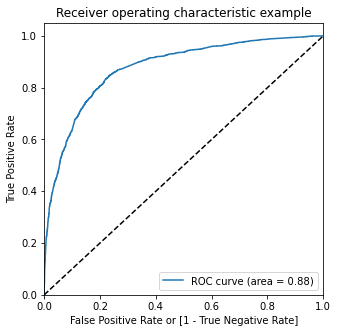

In [85]:
#Draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### Area under ROC curve is 0.88 which is good

In [86]:
#Finding optimal cut-off point
# Let's do predictions with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.079698,6159,0,7.969777,1,0,0,0,0,0,0,0,0,0
1,1,0.564985,3918,1,56.498471,1,1,1,1,1,1,0,0,0,0
2,0,0.027980,2190,0,2.798049,1,0,0,0,0,0,0,0,0,0
3,1,0.984291,4281,1,98.429070,1,1,1,1,1,1,1,1,1,1
4,1,0.702168,8886,1,70.216775,1,1,1,1,1,1,1,1,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity  Precision
0.0          0.0  0.387357       1.0000     0.000000   0.387357
0.1          0.1  0.580415       0.9680     0.335357   0.479398
0.2          0.2  0.727456       0.9164     0.607992   0.596459
0.3          0.3  0.797335       0.8472     0.765807   0.695795
0.4          0.4  0.805857       0.7668     0.830551   0.741013
0.5          0.5  0.806941       0.6968     0.876581   0.781166
0.6          0.6  0.792842       0.5944     0.918311   0.821448
0.7          0.7  0.774403       0.5044     0.945119   0.853180
0.8          0.8  0.747134       0.3908     0.972433   0.899632
0.9          0.9  0.702200       0.2492     0.988619   0.932635


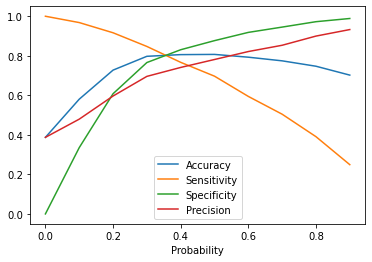

In [88]:
# Let's plot accuracy,sensitivity,specificity and precision for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity','Precision'])
plt.show()

### As we can see the optimum point for cut-off is 0.3

In [89]:
#Final predictions with cut-off 0.3
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final['Score'] = round(y_train_pred_final['Score'],0).astype(int)
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.079698,6159,0,8,1,0,0,0,0,0,0,0,0,0,0
1,1,0.564985,3918,1,56,1,1,1,1,1,1,0,0,0,0,1
2,0,0.027980,2190,0,3,1,0,0,0,0,0,0,0,0,0,0
3,1,0.984291,4281,1,98,1,1,1,1,1,1,1,1,1,1,1
4,1,0.702168,8886,1,70,1,1,1,1,1,1,1,1,0,0,1


In [90]:
#let's now find the metrics for the final model on train data
conf_mat = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted)
print(conf_mat)
TN = conf_mat[0,0]
TP = conf_mat[1,1]
FP = conf_mat[0,1]
FN = conf_mat[1,0]
acc = round((TP+TN)/(TP+TN+FP+FN),3)
spe = round((TN)   /(TN+FP),3)
sen = round((TP)   /(TP+FN),3)
prc = round((TP)   /(TP+FP),3)
print("Accuracy=",acc,"Senstivity=",sen,"Specificity=",spe,"Precision=",prc)

[[3028  926]
 [ 382 2118]]
Accuracy= 0.797 Senstivity= 0.847 Specificity= 0.766 Precision= 0.696


## Result: Train data
### Accuracy=0.797 , Senstivity= 0.847, Specificity= 0.766, Precision= 0.696

# <font color="Blue">9. Model Evaluation (on test data)</font>

In [91]:
#Scaling numerical columns on test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,Lead Origin_Landing Page Submission,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,What is your current occupation_Student,What is your current occupation_Working Professional,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others
1764,0,-1.149877,-0.891830,-1.272474,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4873,0,0.290384,-0.658538,0.989023,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5052,0,-1.149877,-0.891830,-1.272474,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4899,0,1.010515,-0.443471,2.119771,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6858,0,1.010515,0.826879,-0.141725,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [92]:
# Now let's select the same 14 columns that we used in our final model and create X_test and y_test
X_test = X_test[final_cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Others,Last Notable Activity_Modified,What is your current occupation_Student,What is your current occupation_Working Professional,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Specialization_Others
1764,0,-1.149877,-0.891830,0,0,1,0,0,0,0,0,0,1,1
4873,0,0.290384,-0.658538,1,0,0,0,0,0,0,1,0,0,1
5052,0,-1.149877,-0.891830,0,0,0,0,0,0,0,1,0,1,1
4899,0,1.010515,-0.443471,1,0,0,0,0,0,0,0,0,0,1
6858,0,1.010515,0.826879,1,0,0,0,0,0,0,1,0,0,0


In [93]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting Prospect Id to index
y_test_df['Prospect ID'] = y_test.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect Id','Converted','Converted_Prob'], axis=1)
y_pred_final['Score']=y_pred_final['Converted_Prob']*100
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
#y_pred_final.head()

In [94]:
# let's now build the confusion matrix for test data
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion2)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's check the overall accuracy.
acc = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),3)
# Let's see the sensitivity of our logistic regression model
sen = round(TP / float(TP+FN),3)
# Let us calculate specificity
spe = round( TN / float(TN+FP),3)
#Let us calculate prescision
prc= round(TP   / float(TP+FP),3)
print("Accuracy=",acc,"Senstivity=",sen,"Specificity=",spe,"Precision=",prc)

[[1318  396]
 [ 154  898]]
Accuracy= 0.801 Senstivity= 0.854 Specificity= 0.769 Precision= 0.694


## Result: Test data
### Accuracy=0.801, Sensitivity= 0.854, Specificity= 0.769, Precision= 0.694

# <font color="Blue">10. Summary of Lead Score Assignment</font>

In [95]:
#Let's now go to the complete data set
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Other Cities,City_Other Cities of Maharashtra,Lead Origin_Landing Page Submission,Lead Origin_Others,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [96]:
# let's now get prediction probabilities for all the records
# first let's create the compatible X
X= lead_data.copy(deep=True)
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X= X[final_cols] #final_cols being the final list of columns in the model
sm.add_constant(X_test)
y_predictions = res.predict(sm.add_constant(X))

In [97]:
# Let's assign the Lead Score
lead_data["LeadScore"] = round(y_predictions*100,0).astype(int)
#Let's just check if top values are against Converted and least values against not converted
lead_data[["Converted","LeadScore"]].sort_values(by="LeadScore",ascending=False)

,Converted,LeadScore
6784,1,100
6647,1,100
8055,1,100
2665,1,100
8052,1,100
...,...,...
8614,0,1
5643,0,1
5523,0,1
5910,0,1


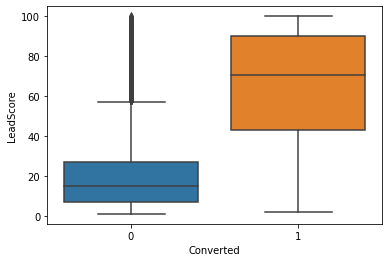

In [98]:
# as can be seen , higher lead scores have been assigned to converted leads quiet consistently
sns.boxplot(y="LeadScore",x="Converted",data=lead_data)
plt.show()

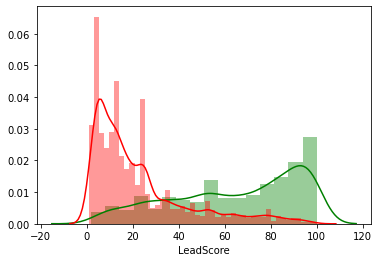

In [99]:
# let's see the distrbution of the lead scores assigned
sns.distplot(lead_data["LeadScore"][lead_data.Converted==1],color="Green")
sns.distplot(lead_data["LeadScore"][lead_data.Converted==0],color="Red")
plt.show()